# Mariia Aleksandrovych

### Assiment 2


## Part A: Model Code and Exploration

1. Perform Exploratory Data Analysis (EDA) and discuss the data and what you observe prior to beginning modeling and how impact how to proceed [10]

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [382]:
df = pd.read_csv("8k_diabetes_v2.csv")
df

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,readmitted,distance_to_hospital,is_patient
0,NaN,0,Surgery-Neuro,Physician Referral,35,False,NaN,1
1,"First-degree perineal laceration, unspecified ...",0,?,Physician Referral,8,False,12.672400,1
2,Pneumococcal pneumonia [Streptococcus pneumoni...,1,Family/GeneralPractice,NaN,12,True,13.241222,1
3,Cellulitis and abscess of face; Streptococcus ...,0,?,Transfer from another health care facility,33,False,39.340022,1
4,"Bipolar I disorder, single manic episode, unsp...",0,Psychiatry,Emergency Room,31,False,25.601328,1
...,...,...,...,...,...,...,...,...
7995,Atherosclerosis of aorta; Cerebral thrombosis ...,1,Surgery-Cardiovascular/Thoracic,Physician Referral,56,False,NaN,1
7996,Disorders of mineral metabolism; Alteration of...,0,Emergency/Trauma,Emergency Room,44,False,36.392020,1
7997,Coronary atherosclerosis of unspecified type o...,1,?,NaN,25,False,22.219686,1
7998,"Congestive heart failure, unspecified; Paroxys...",1,Surgery-General,Emergency Room,61,False,19.742794,1


In [383]:
df.head()

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,readmitted,distance_to_hospital,is_patient
0,NaN,0,Surgery-Neuro,Physician Referral,35,False,NaN,1
1,"First-degree perineal laceration, unspecified ...",0,?,Physician Referral,8,False,12.672400,1
2,Pneumococcal pneumonia [Streptococcus pneumoni...,1,Family/GeneralPractice,NaN,12,True,13.241222,1
3,Cellulitis and abscess of face; Streptococcus ...,0,?,Transfer from another health care facility,33,False,39.340022,1
4,"Bipolar I disorder, single manic episode, unsp...",0,Psychiatry,Emergency Room,31,False,25.601328,1


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diag_desc_combined    7534 non-null   object 
 1   number_inpatient      8000 non-null   int64  
 2   medical_specialty     8000 non-null   object 
 3   admission_source_id   7250 non-null   object 
 4   num_lab_procedures    8000 non-null   int64  
 5   readmitted            8000 non-null   bool   
 6   distance_to_hospital  7384 non-null   float64
 7   is_patient            8000 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 445.4+ KB


In [385]:
unique_values = df['is_patient'].nunique()
column_size = df['is_patient'].shape[0]
print ( "unique values: ", unique_values)
print ("size: ", column_size)

unique values:  1
size:  8000


Column "is_patient" does not provide any information as all the values are 1 that is indicate that all the ppl are patients. I decied to drop it.

In [386]:
# drop the column "is_patient"
df_new = df.drop('is_patient', axis=1) 

In [387]:
df_new

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,readmitted,distance_to_hospital
0,NaN,0,Surgery-Neuro,Physician Referral,35,False,NaN
1,"First-degree perineal laceration, unspecified ...",0,?,Physician Referral,8,False,12.672400
2,Pneumococcal pneumonia [Streptococcus pneumoni...,1,Family/GeneralPractice,NaN,12,True,13.241222
3,Cellulitis and abscess of face; Streptococcus ...,0,?,Transfer from another health care facility,33,False,39.340022
4,"Bipolar I disorder, single manic episode, unsp...",0,Psychiatry,Emergency Room,31,False,25.601328
...,...,...,...,...,...,...,...
7995,Atherosclerosis of aorta; Cerebral thrombosis ...,1,Surgery-Cardiovascular/Thoracic,Physician Referral,56,False,NaN
7996,Disorders of mineral metabolism; Alteration of...,0,Emergency/Trauma,Emergency Room,44,False,36.392020
7997,Coronary atherosclerosis of unspecified type o...,1,?,NaN,25,False,22.219686
7998,"Congestive heart failure, unspecified; Paroxys...",1,Surgery-General,Emergency Room,61,False,19.742794


we have text data column name "diag_desc_combined", categorical data columns "medical_specialty", "admission_source_id", "number_inpatient"; and numerical data "num_lab_procedures", "distance_to_hospital".

### Preprocessing of numerical data
3. Pre-processed numerical data appropriately including handling missing data and
justified methods used. Note this may be different for each algorithm you try. [10 pts]

In [388]:
stat = df_new.describe()
columns = ['num_lab_procedures', 'distance_to_hospital']
statistics_all = stat.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], columns]
statistics_all

,num_lab_procedures,distance_to_hospital
mean,43.098500,25.029571
std,19.370266,14.498494
min,1.000000,0.004441
25%,32.000000,12.325162
50%,44.000000,25.067822
75%,57.000000,37.416795
max,120.000000,49.982344


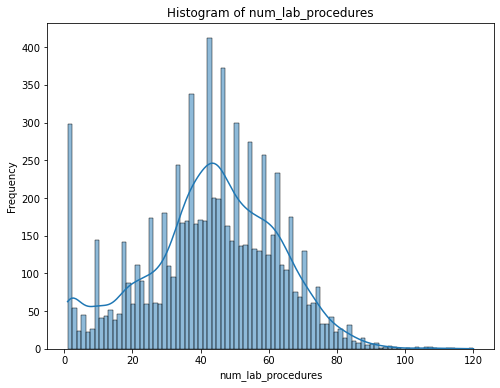

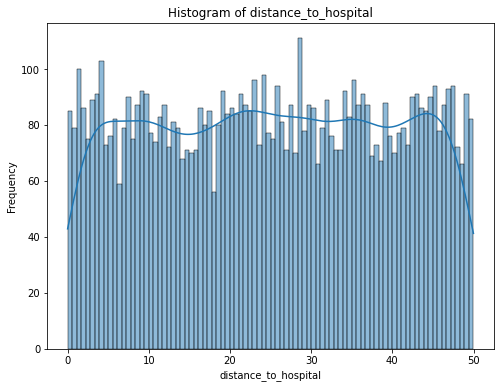

In [389]:
num_bins = 90
#histogram for each column
for column in columns:
    plt.figure(figsize=(8, 6)) 
    sns.histplot(df_new[column], bins=num_bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

check for the missing values in numerical data

In [390]:
df_new.isnull().sum()

diag_desc_combined      466
number_inpatient          0
medical_specialty         0
admission_source_id     750
num_lab_procedures        0
readmitted                0
distance_to_hospital    616
dtype: int64

The column 'distance_to_hospital' has 616 missing values, which account for 7.7% of all the data. I will input the mean values for the missing entries.

In [391]:
#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_distance_to_hospital'] = df_new['distance_to_hospital'].notna().astype(int)
df_new.head()

,diag_desc_combined,number_inpatient,medical_specialty,admission_source_id,num_lab_procedures,readmitted,distance_to_hospital,has_distance_to_hospital
0,NaN,0,Surgery-Neuro,Physician Referral,35,False,NaN,0
1,"First-degree perineal laceration, unspecified ...",0,?,Physician Referral,8,False,12.672400,1
2,Pneumococcal pneumonia [Streptococcus pneumoni...,1,Family/GeneralPractice,NaN,12,True,13.241222,1
3,Cellulitis and abscess of face; Streptococcus ...,0,?,Transfer from another health care facility,33,False,39.340022,1
4,"Bipolar I disorder, single manic episode, unsp...",0,Psychiatry,Emergency Room,31,False,25.601328,1


In [392]:
# input 'median' instead of missing values.

df_new['distance_to_hospital'].fillna(df_new['distance_to_hospital'].median(), inplace=True)
df_new.isnull().sum()

diag_desc_combined          466
number_inpatient              0
medical_specialty             0
admission_source_id         750
num_lab_procedures            0
readmitted                    0
distance_to_hospital          0
has_distance_to_hospital      0
dtype: int64

Now, I will normalize the numerical data. Additionally, the histograms and statistical data show that the data doesn't have outliers.

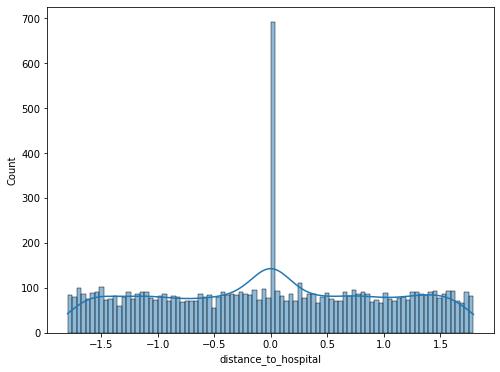

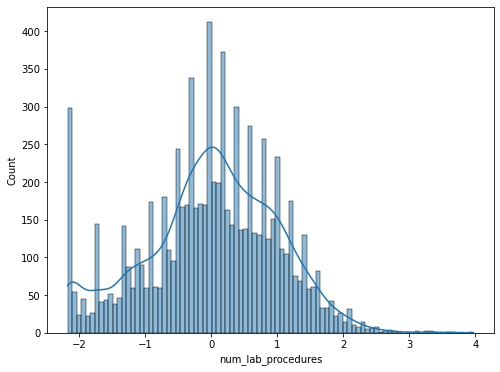

In [393]:
from sklearn.preprocessing import StandardScaler
# scaling data 'distance_to_hospital' and 'num_lab_procedures'

#assine scaler
scaler = StandardScaler()

df_new['distance_to_hospital'] = scaler.fit_transform(df_new['distance_to_hospital'].values.reshape(-1, 1))
df_new['num_lab_procedures'] = scaler.fit_transform(df_new['num_lab_procedures'].values.reshape(-1, 1))

#ploting histogram to see results
plt.figure(figsize=(8, 6))
sns.histplot(df_new['distance_to_hospital'], bins=num_bins, kde=True)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_new['num_lab_procedures'], bins=num_bins, kde=True)
plt.show()

### Pre-processed categorical data

2. Pre-processed categorical data for use in the model and justified pre-processing
method. Note this may be different for each algorithm you try. [10 pts]

In [394]:
# chacking distribution among categories
df_new['medical_specialty'].value_counts().sort_index()

?                                       3229
Anesthesiology-Pediatric                   2
Cardiology                               580
Cardiology-Pediatric                       3
Emergency/Trauma                         407
Endocrinology                             15
Family/GeneralPractice                   698
Gastroenterology                          50
Gynecology                                 6
Hematology                                 1
Hematology/Oncology                       13
Hospitalist                                2
InfectiousDiseases                         2
InternalMedicine                        1562
Nephrology                               126
Neurology                                 22
Obsterics&Gynecology-GynecologicOnco       4
Obstetrics                                 1
ObstetricsandGynecology                   78
Oncology                                  32
Ophthalmology                              3
Orthopedics                              106
Orthopedic

In [395]:
#cheking for the missing values
df_new['medical_specialty'].isnull().sum()

0

In [396]:
#checking distribution categoriies
df_new['admission_source_id'].value_counts().sort_index()

Clinic Referral                                    134
Court/Law Enforcement                                1
Emergency Room                                    3969
HMO Referral                                        29
Not Available                                       13
Not Mapped                                          16
Physician Referral                                2387
Transfer from a Skilled Nursing Facility (SNF)      93
Transfer from a hospital                           322
Transfer from another health care facility         286
Name: admission_source_id, dtype: int64

In [397]:
#checking missing values
df_new['admission_source_id'].isnull().sum()

750

In [398]:
#checking distribution categoriies
df_new['number_inpatient'].value_counts().sort_index()

0    6045
1    1295
2     408
3     149
4      54
5      29
6      10
7       5
8       2
9       3
Name: number_inpatient, dtype: int64

In [399]:
#checking missing values
df_new['number_inpatient'].isnull().sum()

0

Missing values for the 
'medical_specialty': 3229  
'admission_source_id': 750  
'number_inpatient': 0  

##### predict the category valus using randomforest dessition tree and logistic regressor


In [400]:
print(df_new.dtypes)

diag_desc_combined           object
number_inpatient              int64
medical_specialty            object
admission_source_id          object
num_lab_procedures          float64
readmitted                     bool
distance_to_hospital        float64
has_distance_to_hospital      int32
dtype: object


In [401]:
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# create data for the regressors
#question_mark_mask = df_new['medical_specialty'] == '?'
target_column = df_new['medical_specialty']
test_data = df_new[df_new['medical_specialty'] == '?']
train_data = df_new[df_new['medical_specialty'] != '?']

X = train_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
y = train_data['medical_specialty']

# Split the data into a training 80% amd test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train a Logistic Regression Classifierc 
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, C=1.0, random_state=42)
lr_model.fit(X_train, y_train)

# Predict missing values using the trained Decision Tree, Random Forest, and Logistic Regression models
predicted_categories_dt = dt_model.predict(X_test)
predicted_categories_rf = rf_model.predict(X_test)
predicted_categories_lr = lr_model.predict(X_test)

# Evaluate the models using accuracy
accuracy_dt = accuracy_score(y_test, predicted_categories_dt)
accuracy_rf = accuracy_score(y_test, predicted_categories_rf)
accuracy_lr = accuracy_score(y_test, predicted_categories_lr)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# cross-validation 
# cv for the Decision Tree
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_mean_accuracy = dt_scores.mean()
dt_std_accuracy = np.std(dt_scores)

# cv for the Random Forest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_mean_accuracy = rf_scores.mean()
rf_std_accuracy = np.std(rf_scores)

# cv for the Logistic Regression
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
lr_mean_accuracy = lr_scores.mean()
lr_std_accuracy = np.std(lr_scores)

print(f"Decision Tree Mean Accuracy: {dt_mean_accuracy:.4f} ± {dt_std_accuracy:.4f}")
print(f"Random Forest Mean Accuracy: {rf_mean_accuracy:.4f} ± {rf_std_accuracy:.4f}")
print(f"Logistic Regression Mean Accuracy: {lr_mean_accuracy:.4f} ± {lr_std_accuracy:.4f}")

#select the model with the highest accuracy
best_model = None
if dt_mean_accuracy >= rf_mean_accuracy and dt_mean_accuracy >= lr_mean_accuracy:
    best_model = dt_model
elif rf_mean_accuracy >= dt_mean_accuracy and rf_mean_accuracy >= lr_mean_accuracy:
    best_model = rf_model
else:
    best_model = lr_model
    
print(f"The best model is:", best_model)

Decision Tree Accuracy: 0.1569
Random Forest Accuracy: 0.2029
Logistic Regression Accuracy: 0.3389


C:\Users\aleks\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Mean Accuracy: 0.1931 ± 0.0093
Random Forest Mean Accuracy: 0.2194 ± 0.0080
Logistic Regression Mean Accuracy: 0.3433 ± 0.0039
The best model is: LogisticRegression(max_iter=1000, random_state=42)


In [402]:
df_new['medical_specialty'].value_counts().sort_index()

?                                       3229
Anesthesiology-Pediatric                   2
Cardiology                               580
Cardiology-Pediatric                       3
Emergency/Trauma                         407
Endocrinology                             15
Family/GeneralPractice                   698
Gastroenterology                          50
Gynecology                                 6
Hematology                                 1
Hematology/Oncology                       13
Hospitalist                                2
InfectiousDiseases                         2
InternalMedicine                        1562
Nephrology                               126
Neurology                                 22
Obsterics&Gynecology-GynecologicOnco       4
Obstetrics                                 1
ObstetricsandGynecology                   78
Oncology                                  32
Ophthalmology                              3
Orthopedics                              106
Orthopedic

Just to say that above data is very imbalanced, i.e. some categories have only one member. :(

In [403]:
# Predict missing values using the trained Decision Tree, Random Forest, and Logistic Regression models
X_missing = test_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
predicted_missing_rf = rf_model.predict(X_missing)
predicted_missing_rf # i picked rf

array(['Emergency/Trauma', 'Family/GeneralPractice',
       'Pediatrics-Endocrinology', ..., 'Surgery-General', 'Pulmonology',
       'Family/GeneralPractice'], dtype=object)

In [404]:
#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_medical_specialty'] = df_new['medical_specialty'].apply(lambda x: 0 if x == '?' else 1)

In [405]:
#replaced missing values with the predicted classes
df_new.loc[df_new['medical_specialty'] == '?', 'medical_specialty'] = predicted_missing_rf

In [406]:
#target encoding
#mean target encoding
mean_target = df_new.groupby('medical_specialty')['readmitted'].mean().reset_index()
mean_target = mean_target.rename(columns={'readmitted': 'medical_specialty_encoded'})

#combine the mean target encoding with the original df
df_new = df_new.merge(mean_target, on='medical_specialty', how='left')

#drop the original 'medical_specialty' column and rename the encoded column
df_new.drop('medical_specialty', axis=1, inplace=True)
df_new = df_new.rename(columns={'medical_specialty_encoded': 'medical_specialty'})

Predicting missing values for the 'admission_source_id' column.

In [407]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Separate data into train and test
test_data = df_new[df_new['admission_source_id'].isnull()]
train_data = df_new[~df_new['admission_source_id'].isnull()]

X = train_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
y = train_data['admission_source_id'] 

# Split the data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Create Encoder 
encoder = LabelEncoder()
y_train_encd = encoder.fit_transform(y_train)
y_test_encd = encoder.fit_transform(y_test)


# Train a Decision Tree Classifier
dt_model_2 = DecisionTreeClassifier(random_state=42)
dt_model_2.fit(X_train, y_train)

# Train a Random Forest Classifier
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train, y_train)

# Train a Logistic Regression Classifier
lr_model_2 = LogisticRegression(solver='lbfgs', max_iter=1000, C=1.0, random_state=42)
lr_model_2.fit(X_train, y_train_encd)

# Predict missing values using the trained models
predicted_categories_dt = dt_model_2.predict(X_test)
predicted_categories_rf = rf_model_2.predict(X_test)
predicted_categories_lr = lr_model_2.predict(X_test)

predicted_classes_lr_orign = encoder.inverse_transform(predicted_categories_lr)

# Evaluate the models using accuracy
accuracy_dt = accuracy_score(y_test, predicted_categories_dt)
accuracy_rf = accuracy_score(y_test, predicted_categories_rf)
accuracy_lr = accuracy_score(y_test_encd, predicted_categories_lr)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Cross-validation for Decision Tree
dt_scores = cross_val_score(dt_model_2, X_train, y_train, cv=5, scoring='accuracy')
dt_mean_accuracy = dt_scores.mean()
dt_std_accuracy = np.std(dt_scores)

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model_2, X_train, y_train, cv=5, scoring='accuracy')
rf_mean_accuracy = rf_scores.mean()
rf_std_accuracy = np.std(rf_scores)

# Cross-validation for Logistic Regression
lr_scores = cross_val_score(lr_model_2, X_train, y_train_encd, cv=5, scoring='accuracy')
lr_mean_accuracy = lr_scores.mean()
lr_std_accuracy = np.std(lr_scores)

print(f"Decision Tree Mean Accuracy: {dt_mean_accuracy:.4f} ± {dt_std_accuracy:.4f}")
print(f"Random Forest Mean Accuracy: {rf_mean_accuracy:.4f} ± {rf_std_accuracy:.4f}")
print(f"Logistic Regression Mean Accuracy: {lr_mean_accuracy:.4f} ± {lr_std_accuracy:.4f}")

# Select the model with the highest accuracy
best_model = None
if dt_mean_accuracy >= rf_mean_accuracy and dt_mean_accuracy >= lr_mean_accuracy:
    best_model = dt_model
elif rf_mean_accuracy >= dt_mean_accuracy and rf_mean_accuracy >= lr_mean_accuracy:
    best_model = rf_model
else:
    best_model = lr_model

print(f"The best model is:", best_model)


Decision Tree Accuracy: 0.4483
Random Forest Accuracy: 0.4683
Logistic Regression Accuracy: 0.0062


C:\Users\aleks\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\aleks\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Mean Accuracy: 0.4353 ± 0.0166
Random Forest Mean Accuracy: 0.4769 ± 0.0161
Logistic Regression Mean Accuracy: 0.5705 ± 0.0096
The best model is: LogisticRegression(max_iter=1000, random_state=42)


In [408]:
predicted_classes_lr_orign

array(['HMO Referral', 'HMO Referral', 'HMO Referral', ...,
       'HMO Referral', 'HMO Referral', 'HMO Referral'], dtype=object)

In [409]:
predicted_categories_rf

array(['Emergency Room', 'Emergency Room', 'Physician Referral', ...,
       'Emergency Room', 'Emergency Room', 'Emergency Room'], dtype=object)

I got very suspicious results just for accuracy Logistic Regression as 0.0125 by accuracy after cross-validation is 0.5689. I will use the Random Forest model for the missing data prediction.

In [410]:
# Predict missing values using the trained Random Forest
X_missing_2 = test_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
predicted_missing_rf_2 = rf_model_2.predict(X_missing_2)

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_admission_source_id'] = df_new['admission_source_id'].notnull().astype(int)

# replaced missing values with the predicted classes
df_new.loc[df_new['admission_source_id'].isnull(), 'admission_source_id'] = predicted_missing_rf_2

In [411]:
#target encoding
#mean target encoding
mean_target = df_new.groupby('admission_source_id')['readmitted'].mean().reset_index()
mean_target = mean_target.rename(columns={'readmitted': 'admission_source_id_encoded'})

#combine the mean target encoding with the original df
df_new = df_new.merge(mean_target, on='admission_source_id', how='left')

#drop the original 'admission_source_id' column and rename the encoded column
df_new.drop('admission_source_id', axis=1, inplace=True)
df_new = df_new.rename(columns={'admission_source_id_encoded': 'admission_source_id'})

### Preporcessing Text Data


we have 466 missing rows for the test data. It is 5.9% from all data set. That is why i decided to drop missing text rows form the data frame.

In [412]:
missing_rows = df['diag_desc_combined'].isna().sum()
missing_rows

466

In [413]:
df_new.dropna(subset=['diag_desc_combined'], inplace=True)

4. Implement a model to make predictions using text data using tf-idf [20 pts]

In [552]:
# #encoding readmitted to 0 and 1
df_new['readmitted'] = df_new['readmitted'].astype(int)

#split data set df_new into 50 - train 50 - test
X = df_new.drop(columns=['readmitted'])  # dropping 'readmitted' because it's our target
y = df_new['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)
print(X_train.size, y_train.size,
       X_test.size, y_test.size)

33903 3767 33903 3767


In [553]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#calculate tf–idf scores for every word
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

#fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train['diag_desc_combined'])

#transform the testing data
X_test_tfidf = tfidf.transform(X_test['diag_desc_combined'])

#train a TF-IDF model
tfidf_model = LinearRegression() #GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
tfidf_model.fit(X_train_tfidf, y_train)

#predictions with the TF-IDF model
tfidf_predictions = tfidf_model.predict(X_test_tfidf)

5. Use model stacking to incorporate tf-idf predictions for the text field
(diag_desc_combined) in the downstream algorithm [20 pts]

In [554]:
# add prediction form text to data frame
X_test['tfidf_predictions'] = tfidf_predictions

# save text column
X_train_text = X_train['diag_desc_combined']
X_test_text = X_test['diag_desc_combined']
#drop text from df
X_test_notext = X_test.drop(columns=['diag_desc_combined']) 
X_test_notext.size

33903

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X_test_notext, y_test, test_size=0.2, random_state=42, shuffle=True)

# Print the sizes of the sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3013, 9) (3013,) (754, 9) (754,)


In [556]:
# final predicion model 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

RF_model = RandomForestClassifier()
LR_model = LinearRegression()

# Create and fit a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
LR_model.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1)
#RF_probabilities = RF_model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
#auc = roc_auc_score(y_test, RF_probabilities)

#print("AUC:", auc)

cv_scores = cross_val_score(LR_model, X_test, y_test, cv=2, scoring='roc_auc')

# Print the cross-validation scores
print("AUC Scores:", cv_scores)

# Calculate and print the mean AUC score and its standard deviation
mean_auc = cv_scores.mean()
std_auc = cv_scores.std()
print("Mean AUC:", mean_auc)
print("Standard Deviation of AUC:", std_auc)

AUC Scores: [0.61713778 0.60855069]
Mean AUC: 0.6128442346127534
Standard Deviation of AUC: 0.004293544184333864


6. Perform experimentation for multiple modeling algorithms and justify why you
selected the experiments you chose [20 pts]

In [565]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import xgboost as xgb
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(),
    'Desition Tree': DecisionTreeClassifier(random_state=42),
    'gb_model': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Ridge Regression': RidgeClassifier(alpha=0.1, max_iter=2000, random_state=42), 
    'Lasso Regression': Lasso(max_iter=2000, random_state=42),
    'Linear SVM': LinearSVC(random_state=42),
    'GBDT': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}
auc_scores = {}

for model_name, model in models.items():
    # fit the model on the training data
    model.fit(X_train, y_train)

    # rpedict probabilities on the test data
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # for models that don't have predict_proba !!!, use decision_function or predict method
        y_pred_prob = model.decision_function(X_test) if hasattr(model, 'decision_function') else model.predict(X_test)

    # calculate the AUC score
    auc = roc_auc_score(y_test, y_pred_prob)

    auc_scores[model_name] = auc

# Print the AUC scores for each model
for model_name, auc in auc_scores.items():
    print(f'{model_name}: AUC = {auc}')

C:\Users\aleks\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Logistic Regression: AUC = 0.6227853062646527
Linear Regression: AUC = 0.620774752672875
Random Forest: AUC = 0.6001284721970197
Desition Tree: AUC = 0.49701683203530445
gb_model: AUC = 0.6118143613044645
Ridge Regression: AUC = 0.620847335835033
Lasso Regression: AUC = 0.5
Linear SVM: AUC = 0.621144926799881
GBDT: AUC = 0.6116982282450117
Bagging: AUC = 0.5911063851407751
XGBoost: AUC = 0.5811661210832311


I selected the Logistic Regression because it has best AUC score.

In [616]:
#final code
df = pd.read_csv("8k_diabetes_v2.csv")

#-------------------numerical data -------------------------------------------------------------------

# drop the column "is_patient"
df_new = df.drop('is_patient', axis=1) 

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_distance_to_hospital'] = df_new['distance_to_hospital'].notna().astype(int)
# input 'median' instead of missing values.
df_new['distance_to_hospital'].fillna(df_new['distance_to_hospital'].median(), inplace=True)

# scaling data 'distance_to_hospital' and 'num_lab_procedures'
scaler = StandardScaler()

df_new['distance_to_hospital'] = scaler.fit_transform(df_new['distance_to_hospital'].values.reshape(-1, 1))
df_new['num_lab_procedures'] = scaler.fit_transform(df_new['num_lab_procedures'].values.reshape(-1, 1))

#----------categorical data-----------------------------------------------------------------------------

# create data for the regressors
#question_mark_mask = df_new['medical_specialty'] == '?'
target_column = df_new['medical_specialty']
test_data = df_new[df_new['medical_specialty'] == '?']
train_data = df_new[df_new['medical_specialty'] != '?']

X = train_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
y = train_data['medical_specialty']

# Split the data into a training 80% amd test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict missing values using Random Forest model
X_missing = test_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
predicted_missing_rf = rf_model.predict(X_missing)

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_medical_specialty'] = df_new['medical_specialty'].apply(lambda x: 0 if x == '?' else 1)

#replaced missing values with the predicted classes
df_new.loc[df_new['medical_specialty'] == '?', 'medical_specialty'] = predicted_missing_rf

#target encoding
#mean target encoding
mean_target = df_new.groupby('medical_specialty')['readmitted'].mean().reset_index()
mean_target = mean_target.rename(columns={'readmitted': 'medical_specialty_encoded'})

#combine the mean target encoding with the original df
df_new = df_new.merge(mean_target, on='medical_specialty', how='left')

#drop the original 'medical_specialty' column and rename the encoded column
df_new.drop('medical_specialty', axis=1, inplace=True)
df_new = df_new.rename(columns={'medical_specialty_encoded': 'medical_specialty'})

# Separate data into train and test
test_data = df_new[df_new['admission_source_id'].isnull()]
train_data = df_new[~df_new['admission_source_id'].isnull()]

X = train_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
y = train_data['admission_source_id'] 

# Split the data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train, y_train)

# Predict missing values using the trained Random Forest
X_missing_2 = test_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
predicted_missing_rf_2 = rf_model_2.predict(X_missing_2)

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_admission_source_id'] = df_new['admission_source_id'].notnull().astype(int)

# replaced missing values with the predicted classes
df_new.loc[df_new['admission_source_id'].isnull(), 'admission_source_id'] = predicted_missing_rf_2

#target encoding
#mean target encoding
mean_target2 = df_new.groupby('admission_source_id')['readmitted'].mean().reset_index()
mean_target2 = mean_target2.rename(columns={'readmitted': 'admission_source_id_encoded'})

#combine the mean target encoding with the original df
df_new = df_new.merge(mean_target2, on='admission_source_id', how='left')

#drop the original 'admission_source_id' column and rename the encoded column
df_new.drop('admission_source_id', axis=1, inplace=True)
df_new = df_new.rename(columns={'admission_source_id_encoded': 'admission_source_id'})

# -------------text data-------------------------------------------------------------------------

df_new.dropna(subset=['diag_desc_combined'], inplace=True)

#encoding readmitted to 0 and 1
df_new['readmitted'] = df_new['readmitted'].astype(int)

#split data set df_new into 50 - train 50 - test
X = df_new.drop(columns=['readmitted'])  # dropping 'readmitted' because it's our target
y = df_new['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#calculate tf–idf scores for every word
tfidf = TfidfVectorizer(max_features=500, stop_words='english')

#fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train['diag_desc_combined'])

#transform the testing data
X_test_tfidf = tfidf.transform(X_test['diag_desc_combined'])

#train a TF-IDF model
tfidf_model = LinearRegression()
tfidf_model.fit(X_train_tfidf, y_train)

#predictions with the TF-IDF model
tfidf_predictions = tfidf_model.predict(X_test_tfidf)

# ---------add prediction form text to data frame--------------------------------
X_test['tfidf_predictions'] = tfidf_predictions

#drop text from df
X_test_notext = X_test.drop(columns=['diag_desc_combined']) 

X_train, X_test, y_train, y_test = train_test_split(X_test_notext, y_test, test_size=0.5, random_state=42, shuffle=True)

model = LogisticRegression()
model.fit(X_train, y_train)
if hasattr(model, 'predict_proba'):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
else:
        # for models that don't have predict_proba !!!, use decision_function or predict method
        y_pred_prob = model.decision_function(X_test) if hasattr(model, 'decision_function') else model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f'Logistic Regression: AUC = {auc}')

Logistic Regression: AUC = 0.6423532330216486


In [623]:
#some other part for predictions

#final code
df = pd.read_csv("2k_diabetes_v2_scoring.csv")

#-------------------numerical data -------------------------------------------------------------------

# drop the column "is_patient"
df_new = df.drop('is_patient', axis=1) 

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_distance_to_hospital'] = df_new['distance_to_hospital'].notna().astype(int)
# input 'median' instead of missing values.
df_new['distance_to_hospital'].fillna(df_new['distance_to_hospital'].median(), inplace=True)

# scaling data 'distance_to_hospital' and 'num_lab_procedures'
scaler = StandardScaler()

df_new['distance_to_hospital'] = scaler.fit_transform(df_new['distance_to_hospital'].values.reshape(-1, 1))
df_new['num_lab_procedures'] = scaler.fit_transform(df_new['num_lab_procedures'].values.reshape(-1, 1))

#----------categorical data-----------------------------------------------------------------------------

# create data for the regressors
#question_mark_mask = df_new['medical_specialty'] == '?'
target_column = df_new['medical_specialty']
test_data = df_new[df_new['medical_specialty'] == '?']
train_data = df_new[df_new['medical_specialty'] != '?']

X = train_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
y = train_data['medical_specialty']

# Split the data into a training 80% amd test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict missing values using Random Forest model
X_missing = test_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
predicted_missing_rf = rf_model.predict(X_missing)

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_medical_specialty'] = df_new['medical_specialty'].apply(lambda x: 0 if x == '?' else 1)

#replaced missing values with the predicted classes
df_new.loc[df_new['medical_specialty'] == '?', 'medical_specialty'] = predicted_missing_rf
df_new['medical_specialty'].fillna('Unknown', inplace=True)
#target encoding ------------------------------------------------------------------
# to a new dataset
#df_new['medical_specialty'] = df_new['medical_specialty'].map(mean_target)


#combine the mean target encoding with the original df
df_new = df_new.merge(mean_target, on='medical_specialty', how='left')

#drop the original 'medical_specialty' column and rename the encoded column
df_new.drop('medical_specialty', axis=1, inplace=True)
df_new = df_new.rename(columns={'medical_specialty_encoded': 'medical_specialty'})
df_new['medical_specialty'].fillna(df_new['medical_specialty'].mean(), inplace=True)

# Separate data into train and test
test_data = df_new[df_new['admission_source_id'].isnull()]
train_data = df_new[~df_new['admission_source_id'].isnull()]

# Predict missing values using the trained Random Forest
X_missing_2 = test_data[['num_lab_procedures', 'distance_to_hospital', 'number_inpatient']]
predicted_missing_rf_2 = rf_model_2.predict(X_missing_2)

#add extra column where we have 1 for non-missing values and 0 for missing values
df_new['has_admission_source_id'] = df_new['admission_source_id'].notnull().astype(int)

# replaced missing values with the predicted classes
df_new.loc[df_new['admission_source_id'].isnull(), 'admission_source_id'] = predicted_missing_rf_2

#target encoding
#mean target encoding
#combine the mean target encoding with the original df
df_new = df_new.merge(mean_target2, on='admission_source_id', how='left')

#drop the original 'admission_source_id' column and rename the encoded column
df_new.drop('admission_source_id', axis=1, inplace=True)
df_new = df_new.rename(columns={'admission_source_id_encoded': 'admission_source_id'})

# -------------text data-------------------------------------------------------------------------

df_new.dropna(subset=['diag_desc_combined'], inplace=True)
X_tfidf = tfidf.fit_transform(df_new['diag_desc_combined'])

#predictions with the TF-IDF model
tfidf_predictions = tfidf_model.predict(X_tfidf)

# ---------add prediction form text to data frame--------------------------------
df_new['tfidf_predictions'] = tfidf_predictions

#drop text from df
df_notext = df_new.drop(columns=['diag_desc_combined']) 

y_pred_prob = model.predict_proba(df_notext)[:, 1]

pred_prob_binary = (y_pred_prob >= 0.5).astype(int)

In [624]:
# Converting to a DataFrame
df_y_pred_prob = pd.DataFrame({'predicted_class: 0 -False, 1 - True': pred_prob_binary})

# Save a CSV file
df_y_pred_prob.to_csv('Aleksandrovych_Mariia_pred2.csv', index=False)